Install Daft

We can install Daft using pip. Run the following command in your terminal or notebook:

In [ ]:
pip install -U "daft[all]"

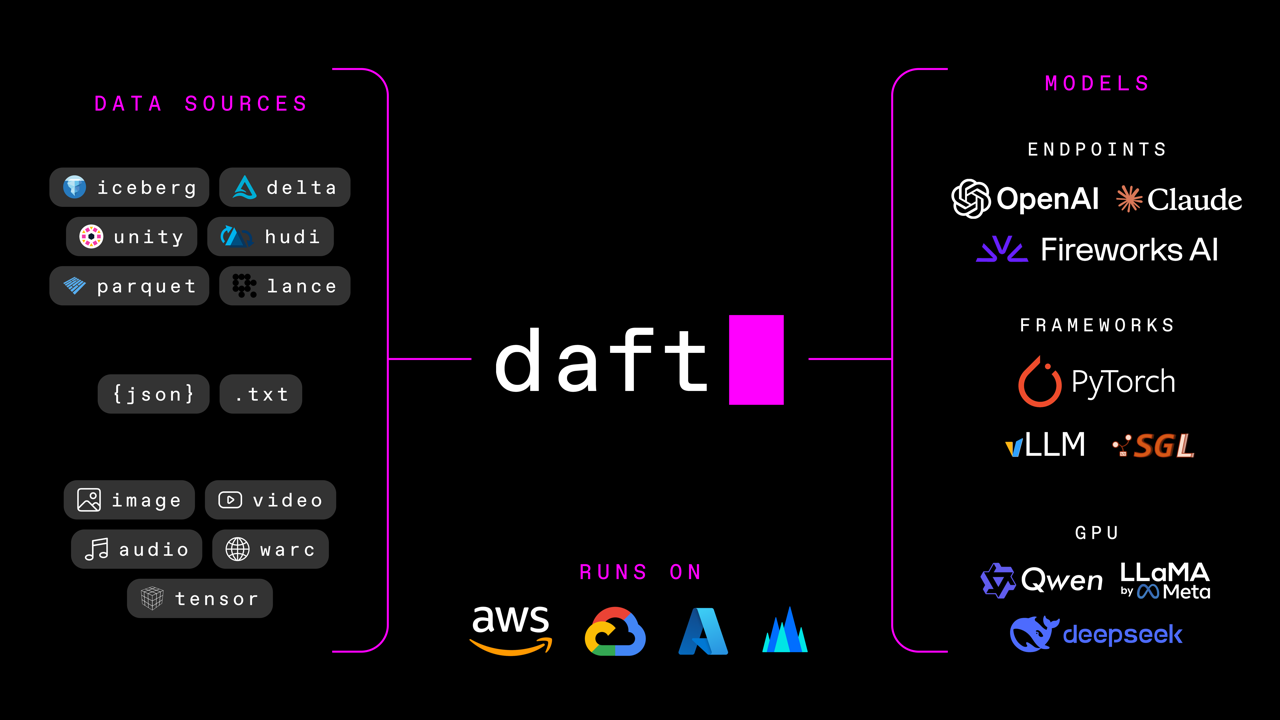

Creating our First Daft Data Frame.

Creating a DataFrae from a Dictionary of Columns

In [ ]:

import daft

df = daft.from_pydict({
    "A": [1, 2, 3, 4],
    "B": [1.5, 2.5, 3.5, 4.5],
    "C": [True, True, False, False],
    "D": [None, None, None, None],
})

df

AInt64,BFloat64,CBool,DNull
1,1.5,true,None
2,2.5,true,None
3,3.5,false,None
4,4.5,false,None


Read From a Data Source

Daft supports both local paths as well as paths to object storage such as AWS S3:

CSV files: daft.read_csv("s3://path/to/bucket/*.csv")

Parquet files: daft.read_parquet("/path/*.parquet")

JSON line-delimited files: daft.read_json("/path/*.json")

Files on disk: daft.from_glob_path("/path/*.jpeg")

Reading a File (Parquet File) from a Public S3 Bucket

# Set IO Configurations to use anonymous data access mode

In [ ]:
daft.set_planning_config(default_io_config=daft.io.IOConfig(s3=daft.io.S3Config(anonymous=True)))
df = daft.read_parquet("s3://daft-public-data/tutorials/10-min/sample-data-dog-owners-partitioned.pq/**")
df

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool


Executing the DataFrame and View Data

Daft is lazy by default. This means that the contents will not be computed (“materialized”) unless you explicitly tell Daft to do so. This is best practice for working with larger-than-memory datasets and parallel/distributed architectures.

In [ ]:
df.collect()


🗡️ 🐟 Parquet Scan: 00:00 

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool
Wolfgang,Winter,23,2001-02-12,Germany,None
Shandra,Shamas,57,1967-01-02,United Kingdom,true
Zaya,Zaphora,40,1984-04-07,United Kingdom,true
Ernesto,Evergreen,34,1990-04-03,Canada,true
James,Jale,62,1962-03-24,Canada,true


In [ ]:
df.show(3)

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool
Wolfgang,Winter,23,2001-02-12,Germany,None
Shandra,Shamas,57,1967-01-02,United Kingdom,true
Zaya,Zaphora,40,1984-04-07,United Kingdom,true


Select Columns

You can select specific columns from your DataFrame with the df.select() method: Similar to how we use pandas




In [ ]:
df.select("first_name", "has_dog").show()

first_nameString,has_dogBool
Wolfgang,None
Shandra,true
Zaya,true
Ernesto,true
James,true


Select Rows

We can filter rows using the df.where() method

In [ ]:
df.where(daft.col("age") >= 40).show()

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool
Shandra,Shamas,57,1967-01-02,United Kingdom,true
Zaya,Zaphora,40,1984-04-07,United Kingdom,true
James,Jale,62,1962-03-24,Canada,true


Exclude Data

We can limit the number of rows in a DataFrame by calling the df.limit() method

In [ ]:
df.limit(2).show()

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool
Wolfgang,Winter,23,2001-02-12,Germany,None
Shandra,Shamas,57,1967-01-02,United Kingdom,true


To drop columns from the DataFrame, use the df.exclude() method.

In [ ]:
df.exclude("DoB").show()

first_nameString,last_nameString,ageInt64,countryString,has_dogBool
Wolfgang,Winter,23,Germany,None
Shandra,Shamas,57,United Kingdom,true
Zaya,Zaphora,40,United Kingdom,true
Ernesto,Evergreen,34,Canada,true
James,Jale,62,Canada,true


Transform Columns with Expressions

Expressions are an API for defining computation that needs to happen over columns.

In [ ]:
df = df.with_column("full_name", daft.col("first_name") + " " + daft.col("last_name"))
df.select("full_name", "age", "country", "has_dog").show()

full_nameString,ageInt64,countryString,has_dogBool
Wolfgang Winter,23,Germany,None
Shandra Shamas,57,United Kingdom,true
Zaya Zaphora,40,United Kingdom,true
Ernesto Evergreen,34,Canada,true
James Jale,62,Canada,true


In [ ]:
df.select((daft.col("first_name").alias("full_name") + " " + daft.col("last_name")), "age", "country", "has_dog").show()

full_nameString,ageInt64,countryString,has_dogBool
Wolfgang Winter,23,Germany,None
Shandra Shamas,57,United Kingdom,true
Zaya Zaphora,40,United Kingdom,true
Ernesto Evergreen,34,Canada,true
James Jale,62,Canada,true


Transform Columns with Custom Logic

Example - Tokenizing a sentence using HuggingFace Transformers

Sort Data

We can sort a DataFrame with the df.sort()

In [ ]:
df.sort(daft.col("age"), desc=False).show()

first_nameString,last_nameString,ageInt64,DoBDate,countryString,has_dogBool
Wolfgang,Winter,23,2001-02-12,Germany,None
Ernesto,Evergreen,34,1990-04-03,Canada,true
Zaya,Zaphora,40,1984-04-07,United Kingdom,true
Shandra,Shamas,57,1967-01-02,United Kingdom,true
James,Jale,62,1962-03-24,Canada,true


Group and Aggregate Data

We can group and aggregate your data using the df.groupby() and the df.agg() methods.

This happens in 2 steps


*   Split data into groups
*   Aggregate data for each group



In [ ]:

grouped = df.groupby("country").agg(
    daft.col("age").mean().alias("avg_age"),
    daft.col("has_dog").count()
).show()

countryString,avg_ageFloat64,has_dogUInt64
United Kingdom,48.5,2
Canada,48,2
Germany,23,0


In [ ]:
import daft
from transformers import AutoTokenizer

df = daft.from_pydict({
    "text": [
        "Daft is a high-performance DataFrame library.",
        "It supports distributed computation and ML integration.",
        "You can use custom logic like tokenization!"
    ]
})

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_text(t):
    print(f"Text: {t}")
    tokens = tokenizer.tokenize(t)
    encoded = tokenizer.encode(t, truncation=True, padding="max_length", max_length=16)
    print(f"Tokens: {tokens}")
    print(f"Embeddings (IDs): {encoded}\n")
    return encoded

df = df.with_column(
    "embeddings",
    df["text"].apply(tokenize_text, return_dtype=daft.DataType.list(daft.DataType.int64()))
)

df.show()


textString,embeddingsList[Int64]
Daft is a high-performance DataFrame library.,"[101, 4830, 6199, 2003, 1037, 2152, 1011, 2836, 2951, 15643, 3075, 1012, 102, 0, 0, 0]"
It supports distributed computation and ML integration.,"[101, 2009, 6753, 5500, 22334, 1998, 19875, 8346, 1012, 102, 0, 0, 0, 0, 0, 0]"
You can use custom logic like tokenization!,"[101, 2017, 2064, 2224, 7661, 7961, 2066, 19204, 3989, 999, 102, 0, 0, 0, 0, 0]"


Sentiment Analysis using Daft (Hugging Face)



In [ ]:
import daft
from transformers import pipeline


sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment"
)

label_map = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

def hf_sentiment(text: str) -> str:
    result = sentiment_pipeline(text)[0]
    return label_map[result["label"]]

sentiment_udf = daft.func(hf_sentiment, return_dtype=str)

df = daft.from_pydict({
    "review": [
        "I absolutely loved this product!",
        "The service was terrible and I'm disappointed.",
        "It works as expected, nothing special.",
        "Just okay, not too bad, not great either."
    ]
})

df = df.with_column("sentiment", sentiment_udf(df["review"])).collect()
df.show()


reviewString,sentimentString
I absolutely loved this product!,POSITIVE
The service was terrible and I'm disappointed.,NEGATIVE
"It works as expected, nothing special.",NEUTRAL
"Just okay, not too bad, not great either.",POSITIVE
